This is where I will be writing up the code for my final project.

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
#constants/scalars
alpha = 2
beta = 1
gamma = 1
delta = 2

def pp(r,t):
    '''Calculates two ODEs that encapsules both the predator and prey models into one variable r
    
    accepts: 
        r: represents a type of array that can be spliced and turned into multiple equations
        t: represents
    pred: ODE modeling the predator population as it changes with respect to the prey's population 
            and time
    prey: represents the ODE modeling the prey population as it changes in time predator's population
            and time 
    returns array([fprey, fpred], float)'''
    prey = r[0]
    pred = r[1]
    fprey = (alpha*prey) - (beta*prey*pred)
    fpred = (gamma*prey*pred) - (delta*pred)
    return np.array([fprey, fpred], float)

def ppr(r,t):
    ''''''
    prey = r[0]
    pred = r[1]
    fprey = (alpha*random.randrange(-1,1)*prey) - (beta*prey*pred)
    fpred = (gamma*prey*pred) - (delta*pred)
    return np.array([fprey, fpred], float)
def RK4(f , a , b , N):
    '''calculates the solution of the input function using the fourth order runge-kutta solving method
    accepts: 
        f - function that returns an array
        a - initial 
        b - final 
        N - steps
    xpoints represents the population of prey
    ypoints represents the population of predators
        returns tpoints, xpoints, and ypoints
    '''
    h = (b-a)/N
    tpoints = np.arange(a,b,h)
    xpoints = []
    ypoints = []
    
    r = np.array([1.0,1.0],float)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+ 2*k2 + 2*k3 +k4)/6
    preyplot = (tpoints, xpoints)
    predplot = (tpoints, ypoints)
#     plt.plot(preyplot[0], preyplot[1])
#     plt.plot(preyplot)
#     plt.plot(predplot)
#     plt.plot(tpoints,xpoints, "k--", label = "prey population")
#     plt.plot(tpoints,ypoints, label = "predator population")
#     plt.xlabel("t")
#     plt.ylabel("x/y(t)")
#     plt.legend()
#     plt.show()
    return tpoints, xpoints, ypoints




### Results

Text(0.5, 1.0, 'equal growth and mortality rates')

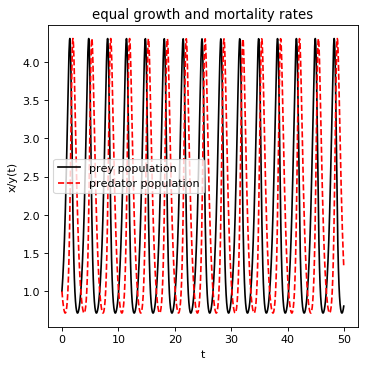

In [46]:
alpha = 2
beta = 1
gamma = 1
delta = 2

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("Equal Growth and Mortality Rates")

This graph shows the relationship where the mortality rate of the predator and the 


In [25]:
ax.legend?

Text(0.5, 1.0, 'Equal Everything')

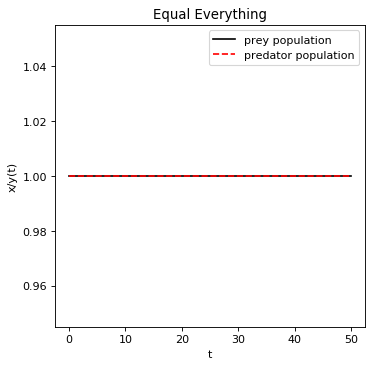

In [47]:
alpha = 1
beta = 1
gamma = 1
delta = 1

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("Equal Everything")

Text(0.5, 1.0, 'No Growth Rate, High Mortality Rate')

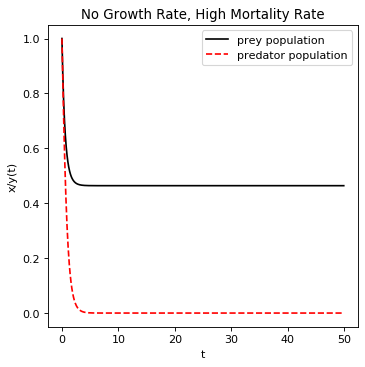

In [48]:
alpha = 0
beta = 1
gamma = 1
delta = 2

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("No Growth Rate, High Mortality Rate")

Text(0.5, 1.0, 'No Mortality Rate, High Growth Rate')

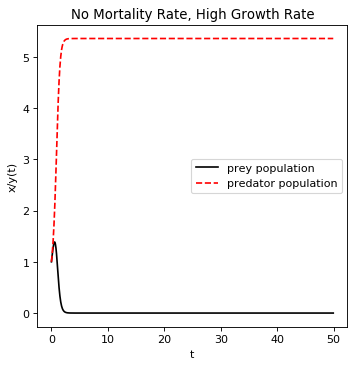

In [55]:
alpha = 2
beta = 1
gamma = 1
delta = 0

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("No Mortality Rate, High Growth Rate")

Text(0.5, 1.0, 'High Growth Rate, Medium Mortality Rate')

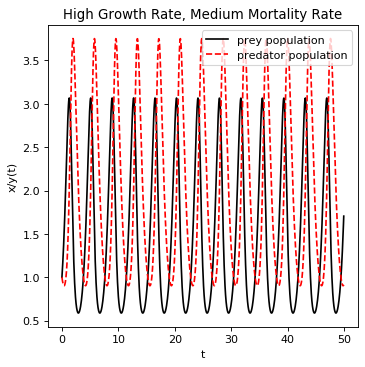

In [51]:
alpha = 2
beta = 1
gamma = 1
delta = 1.5

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("High Growth Rate, Medium Mortality Rate")

Text(0.5, 1.0, 'High Mortality Rate, Medium Growth Rate')

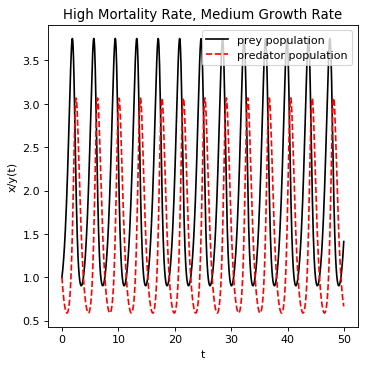

In [53]:
alpha = 1.5
beta = 1
gamma = 1
delta = 2

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("High Mortality Rate, Medium Growth Rate")

Text(0.5, 1.0, 'Zero Interaction Rate')

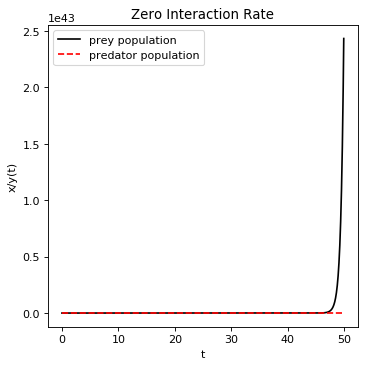

In [52]:
alpha = 2
beta = 0
gamma = 0
delta = 2

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("Zero Interaction Rate")

Text(0.5, 1.0, 'Equal Growth and Mortality Rates')

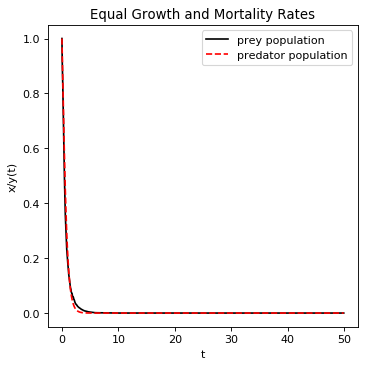

In [12]:
import random
alpha = 2
beta = 1
gamma = 1
delta = 2

RK4(pp, 0, 50, 1000)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = RK4(pp, 0, 50, 1000)
ax.plot(p1[0], p1[1], "k", label ="prey population")
ax.plot(p1[0], p1[2], "r--", label = "predator population")
ax.set_xlabel("t")
ax.set_ylabel("x/y(t)")
ax.legend()
ax.set_title("Equal Growth and Mortality Rates")

### Analysis

From these graphs, we can see a couple solid trends that happen within the model. That is that the predator graph tends to be following the path of the prey in most scenarios that are not limiting cases. The ultimate question we want to answer is how can we maintain this ecosystem for as long as possible, and what constants allow us to do that? If we want to find the most stable relationship possible, we need to have the growth rate of prey, interaction rate of the creatures, and the mortality rate of the predator to be equal. This makes sense because if they are all being eaten, are dying, and growing at the exact same rate, then they will never change. We can see from the "Equal Everything" graph that this is in fact the case. 
    Other more realistic graphs that show stability (meaning neither creature is dying off) are the "Equal Mortality Rates," "High Mortality Rate, Medium Growth Rate" and the "High Growth Rate, Medium Mortality Rate" graphs. In these graphs we can see that the peaks of the predator population occur shortly after the peaks of the prey population. If we can imagine this in the real world, it makes sense because the predators actually have the most food when the prey is at their peak. So the more food they can eat, the healthier they will be. This leads to a rise in predator population. However, that rise in population makes it so that the prey are being eaten ever faster than before, which causes the predator's to spike in population. This spike in predator population causes the population of the prey to decrease. Due to the lack of food and the increased amount of predators, they quickly die off as there is not enough food to support a large predator population. With fewer predators, the prey can begin to rebuild their population. This is the cycle that repeats itself. Another great example of this model is the last graph, the "Zero Interaction Rate" graph. This graph shows what happens what the animals never see each other in the wild. This is a case where the predators still need to find prey to eat, but they simply can't. While it's not necessarily the most realistic scenario, it definitely shows the model working. As we can see, the prey population skyrockets after not being hunted, and the predator population ceases to exist as it cannot find any food. 
    However, there are scenarios where the code does not seem to model what would happen in the real world though. For example, the "No Mortality Rate, High Growth Rate" shows the predator population skyrocketing and then flattening while the prey population dies off and flattens to zero, ultimately becoming extinct. Yet somehow, the predator, who relies on the prey to survive, does not die off. Realistically thinking, this could not happen in the real world because there is no possible way any animal cannot die. If not hunger, it will die of old age. In this sense, the code has not broken, but our constants just are not realistic. There is no way a mortality constant can be zero. So while the code works great to show what happens with reasonable variables, it cannot determine which variables are not realistic in the real world, which can be seen at times during limiting cases. 
    So if we return back to the question, how can we maintain the ecosystem for as long as possible, the most important thing to understand is that our growth rate of the prey and the mortality rate of the predator should be similar. If they are similar, the populations will oscillate with time and they also have room for error with any random circumstance that comes into play. If the growth and decay rates greatly differ, the system becomes much more fragile and is more susceptible to the possibility of one creature dying off due to a random circumstance.